In [9]:
import pandas as pd

# === 1. LOAD DATA ===
print("📌 Membaca data")
df = pd.read_csv('popular_anime.csv')
print("✅ Data berhasil dimuat!\n")

# === 2. STRUKTUR UMUM DATA ===
print("📊 2. STRUKTUR UMUM DATA (df.head())\n")
print(df.head(5))
print("\n" + "="*80 + "\n")

# === 3. INFORMASI TIPE DATA DAN JUMLAH MISSING ===
print("📋 3. STRUKTUR & TIPE DATA (df.info())\n")
print(df.info())
print("\n" + "="*80 + "\n")

# === 4. JUMLAH MISSING VALUE PER KOLOM ===
print("❗ 4. MISSING VALUE PER KOLOM (df.isnull().sum())\n")
print(df.isnull().sum().sort_values(ascending=False))
print("\n" + "="*80 + "\n")

# === 5. STATISTIK DESKRIPTIF UNTUK KOLOM NUMERIK ===
print("📈 5. STATISTIK DATA NUMERIK (df.describe())\n")
print(df.describe())
print("\n" + "="*80 + "\n")

# === 6. DISTRIBUSI NILAI PADA KOLOM KATEGORIK ===
print("🔢 6. DISTRIBUSI KOLOM KATEGORI:\n")

print("🎬 Kolom 'type':")
print(df['type'].value_counts(dropna=False), "\n")

print("📺 Kolom 'status':")
print(df['status'].value_counts(dropna=False), "\n")

print("🔞 Kolom 'rating':")
print(df['rating'].value_counts(dropna=False), "\n")

print("🎭 Kolom 'genres' (Top 10):")
print(df['genres'].value_counts().head(10))


📌 Membaca data
✅ Data berhasil dimuat!

📊 2. STRUKTUR UMUM DATA (df.head())

      id                              name                             genres  \
0  52991     Frieren: Beyond Journey's End          Adventure, Drama, Fantasy   
1   5114  Fullmetal Alchemist: Brotherhood  Action, Adventure, Drama, Fantasy   
2   9253                       Steins;Gate            Drama, Sci-Fi, Suspense   
3  38524   Attack on Titan Season 3 Part 2            Action, Drama, Suspense   
4  28977                  Gintama Season 4             Action, Comedy, Sci-Fi   

  type  episodes           status                 aired_from  \
0   TV      28.0  Finished Airing  2023-09-29T00:00:00+00:00   
1   TV      64.0  Finished Airing  2009-04-05T00:00:00+00:00   
2   TV      24.0  Finished Airing  2011-04-06T00:00:00+00:00   
3   TV      10.0  Finished Airing  2019-04-29T00:00:00+00:00   
4   TV      51.0  Finished Airing  2015-04-08T00:00:00+00:00   

                    aired_to duration_per_ep  score

In [10]:
# Hapus baris yang nilai 'score' kosong
df = df.dropna(subset=['score'])

print("✅ Baris dengan score kosong telah dihapus.")
print(f"Jumlah data setelah pembersihan: {len(df)} baris\n")


✅ Baris dengan score kosong telah dihapus.
Jumlah data setelah pembersihan: 18599 baris



In [11]:
# Buat label baru: True jika score >= 8.0
df['is_popular'] = df['score'] >= 8.0

# Cek distribusi label
print("📊 Distribusi Label 'is_popular':")
print(df['is_popular'].value_counts())
print()


📊 Distribusi Label 'is_popular':
is_popular
False    17903
True       696
Name: count, dtype: int64



In [12]:
# Pilih fitur yang akan digunakan
fitur = ['type', 'episodes', 'status', 'scored_by']
data = df[fitur + ['is_popular']].copy()

print("✅ Fitur yang digunakan:")
print(data.head())
print()


✅ Fitur yang digunakan:
  type  episodes           status  scored_by  is_popular
0   TV      28.0  Finished Airing   676737.0        True
1   TV      64.0  Finished Airing  2223666.0        True
2   TV      24.0  Finished Airing  1467570.0        True
3   TV      10.0  Finished Airing  1700946.0        True
4   TV      51.0  Finished Airing   264260.0        True



In [24]:
# Isi episodes yang kosong dengan median
data['episodes'] = data['episodes'].fillna(data['episodes'].median())

# Isi type/status kosong dengan 'Unknown'
data['type'] = data['type'].fillna('Unknown')
data['status'] = data['status'].fillna('Unknown')

# Isi scored_by kosong dengan 0
data['scored_by'] = data['scored_by'].fillna(0)

print("✅ Missing value sudah ditangani.\n")


✅ Missing value sudah ditangani.



In [23]:
# One-hot encoding
data_encoded = pd.get_dummies(data, columns=['type', 'status'], drop_first=True)

print("✅ Data kategorikal berhasil di-encode.\n")
print("🔍 Contoh data setelah encoding:")
print(data_encoded.head())


✅ Data kategorikal berhasil di-encode.

🔍 Contoh data setelah encoding:
   episodes  scored_by  is_popular  type_Movie  type_Music  type_ONA  \
0      28.0   676737.0        True       False       False     False   
1      64.0  2223666.0        True       False       False     False   
2      24.0  1467570.0        True       False       False     False   
3      10.0  1700946.0        True       False       False     False   
4      51.0   264260.0        True       False       False     False   

   type_OVA  type_PV  type_Special  type_TV  type_TV Special  type_Unknown  \
0     False    False         False     True            False         False   
1     False    False         False     True            False         False   
2     False    False         False     True            False         False   
3     False    False         False     True            False         False   
4     False    False         False     True            False         False   

   status_Finished Airing 

In [33]:
# Misah fitur dan label
X = data_encoded.drop(columns=['is_popular'])  # fitur
y = data_encoded['is_popular']                # label


In [27]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data berhasil dibagi:")
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing : {len(X_test)}\n")


✅ Data berhasil dibagi:
Jumlah data training: 14879
Jumlah data testing : 3720



In [28]:
from sklearn.ensemble import RandomForestClassifier

# Buat model dan latih
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("✅ Model Random Forest berhasil dilatih!\n")


✅ Model Random Forest berhasil dilatih!



In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi data testing
y_pred = model.predict(X_test)

# Hitung akurasi
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Akurasi Model: {acc:.4f}\n")

# Laporan klasifikasi
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🎯 Akurasi Model: 0.9578

📊 Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      3587
        True       0.40      0.38      0.39       133

    accuracy                           0.96      3720
   macro avg       0.69      0.68      0.69      3720
weighted avg       0.96      0.96      0.96      3720

📉 Confusion Matrix:
[[3512   75]
 [  82   51]]


In [19]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =============================
# OVERSAMPLING DATA TRAINING
# =============================
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Cek distribusi label setelah balancing
print("📊 Distribusi Label Setelah Oversampling:")
print(y_train_balanced.value_counts())
print()

# =============================
# TRAINING MODEL DENGAN DATA SEIMBANG
# =============================
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

print("✅ Model berhasil dilatih dengan data yang seimbang!\n")

# =============================
# EVALUASI
# =============================
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"🎯 Akurasi Model: {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📊 Distribusi Label Setelah Oversampling:
is_popular
False    14316
True     14316
Name: count, dtype: int64

✅ Model berhasil dilatih dengan data yang seimbang!

🎯 Akurasi Model: 0.9546

📊 Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.97      0.98      3587
        True       0.38      0.41      0.39       133

    accuracy                           0.95      3720
   macro avg       0.68      0.69      0.69      3720
weighted avg       0.96      0.95      0.96      3720

📉 Confusion Matrix:
[[3496   91]
 [  78   55]]


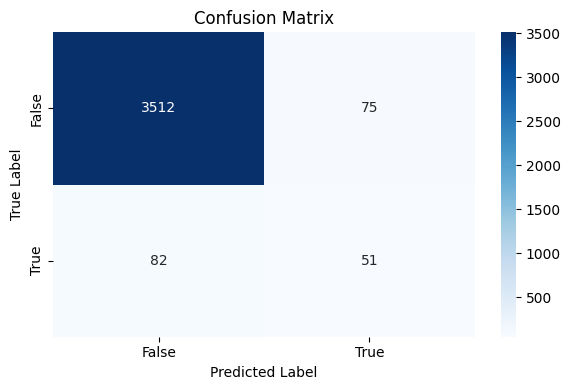

,precision,recall,f1-score,support
False,0.98,0.98,0.98,3587.00
True,0.40,0.38,0.39,133.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.69,0.68,0.69,3720.00
weighted avg,0.96,0.96,0.96,3720.00


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ganti ini dengan hasil prediksi dan y_test kamu
# Contoh:
# y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report sebagai tabel
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(2)  # Bulatkan 2 angka di belakang koma
display(report_df)


In [31]:
# Misalnya dataframe kamu bernama df dan kolom label-nya adalah 'is_popular'
print(df['is_popular'].value_counts())


is_popular
False    17903
True       696
Name: count, dtype: int64
